# Q1

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

📊 **Q1. 전국 시도별 약국 수를 구해주세요!**

- 약국이라는 상권업종소분류명을 가진 업체의 수를 찾아서 빈도수를 계산해보겠습니다.
\
이를 위해서 value_counts, groupby, pivot_table 등 다양한 집계 방법을 활용할 수 있습니다.\
편한 방법을 사용하여 다음 결과를 얻어보겠습니다.

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [3]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [5]:
df_pharmacy = df[df['상권업종소분류명'] == "약국"]
df_pharmacy.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528
10,21057519,민생약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4889046030200780002048274,NaN,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,NaN,NaN,NaN,128.118615,35.575962
15,21006553,상명약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4713010800103400004022515,NaN,경상북도 경주시 금성로 281,780943.0,38156.0,NaN,1,NaN,129.206670,35.842804
16,21026027,햇살약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4117310100111010002005070,샛별한양아파트,경기도 안양시 동안구 달안로 61,431719.0,14043.0,NaN,NaN,NaN,126.948953,37.396502
24,21228644,화정하나로,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4128112300109690000012921,동원텔,경기도 고양시 덕양구 화정로 47,412737.0,10497.0,NaN,3,NaN,126.831406,37.635165


### 방법1: Group_by

In [6]:
result = pd.DataFrame({
    '시도명': df_pharmacy.groupby(['시도명'])['상가업소번호'].count().index,
    '개수': df_pharmacy.groupby(['시도명'])['상가업소번호'].count().values
}).sort_values(by='개수',ascending=False)

result.index = range(1,17+1)
result

,시도명,개수
1,경기도,4510
2,서울특별시,3579
3,부산광역시,1130
4,경상남도,1017
5,인천광역시,1002
6,경상북도,915
7,대구광역시,870
8,전라북도,862
9,충청남도,830
10,전라남도,811


### 방법2: Pivot Table

In [7]:
dataPivot = pd.pivot_table(df_pharmacy, index='시도명',values='상가업소번호',aggfunc='count').reset_index()
dataPivot.columns = ['시도명','개수']
dataPivot = dataPivot.sort_values(by='개수', ascending=False)
dataPivot.index = range(1,17+1)
dataPivot

,시도명,개수
1,경기도,4510
2,서울특별시,3579
3,부산광역시,1130
4,경상남도,1017
5,인천광역시,1002
6,경상북도,915
7,대구광역시,870
8,전라북도,862
9,충청남도,830
10,전라남도,811


### 방법3: value_counts - 질문 왜 nan이 있지? 그리고 또 np.nan 이나 이런걸로 안잡히는듯

In [8]:
import numpy as np
sidoList = [i for i in list(set(df_pharmacy['시도명'])) if i != np.nan]
df_pharmacy[df_pharmacy['시도명'] == 'np.nan']

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도


In [9]:
newData = pd.DataFrame()
for i in sidoList:
  tmp = pd.DataFrame(df_pharmacy[df_pharmacy['시도명'] == i]['시도명'].value_counts())
  newData = pd.concat([newData,tmp],axis=0)

newData.reset_index(inplace=True)
newData.columns = ['시도명','개수']
newData = newData.sort_values(by='개수',ascending=False)
newData.index = range(1,17+1)
newData

,시도명,개수
1,경기도,4510
2,서울특별시,3579
3,부산광역시,1130
4,경상남도,1017
5,인천광역시,1002
6,경상북도,915
7,대구광역시,870
8,전라북도,862
9,충청남도,830
10,전라남도,811


# Q2

📌 **Q2.** 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. \\
병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. \\
그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요! \\

In [10]:
set(df['상권업종중분류명'])

{'병원', '수의업', '약국/한약방', '유사의료업', '의료관련서비스업'}

In [11]:
set(df['상권업종소분류명'])

{'기타병원',
 '내과/외과',
 '노인/치매병원',
 '동물병원',
 '비뇨기과',
 '산부인과',
 '산후조리원',
 '소아과',
 '수의업-기타',
 '수의업-종합',
 '신경외과',
 '안과의원',
 '약국',
 '언어치료',
 '유사의료업기타',
 '응급구조대',
 '이비인후과의원',
 '일반병원',
 '접골원',
 '정형/성형외과',
 '제대혈',
 '조산원',
 '종합병원',
 '척추교정치료',
 '치과기공소',
 '치과병원',
 '치과의원',
 '침구원',
 '탕제원',
 '피부과',
 '한방병원',
 '한약방',
 '한의원',
 '혈액원'}

In [12]:
df_animal = df[df['상권업종소분류명'] == "동물병원"]

result2 = pd.DataFrame({
    '시도명': df_animal.groupby(['시도명'])['상가업소번호'].count().index,
    '개수': df_animal.groupby(['시도명'])['상가업소번호'].count().values
}).sort_values(by='개수',ascending=False)

result2.index = range(1,17+1)
result2


,시도명,개수
1,경기도,992
2,서울특별시,557
3,인천광역시,193
4,경상북도,165
5,경상남도,161
6,부산광역시,153
7,충청남도,131
8,대구광역시,119
9,전라북도,111
10,강원도,85


In [13]:
newdf = df.copy()

In [14]:
animalList= df_animal.index
newdf['동물병원여부'] = '일반병원'
newdf.loc[animalList, '동물병원여부'] = '동물병원'

In [15]:
newdf.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,동물병원여부
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344,일반병원
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742,일반병원
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955,일반병원
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872,일반병원
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528,일반병원


<Axes: xlabel='경도', ylabel='위도'>

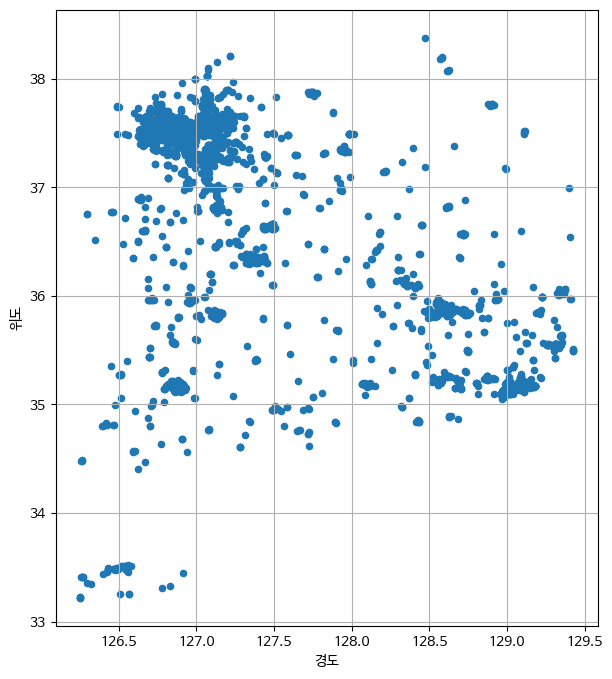

In [16]:
df_animal[['경도','위도','시군구명']].plot.scatter(x='경도',y='위도',figsize=(7,8),grid=True)

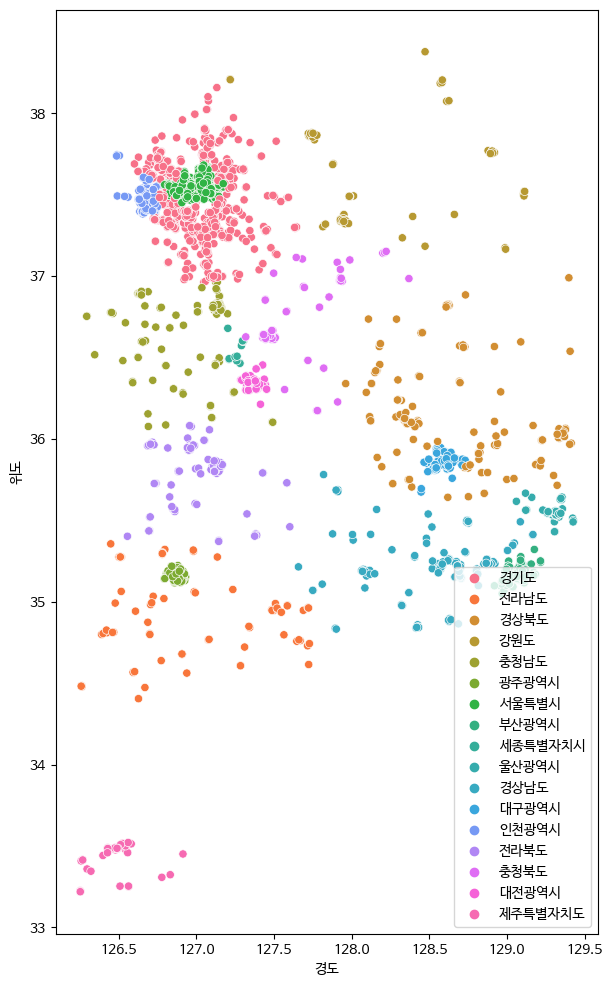

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,12))
sns.scatterplot(data=df_animal, x='경도',y='위도', hue='시도명')
plt.legend(loc='lower right')

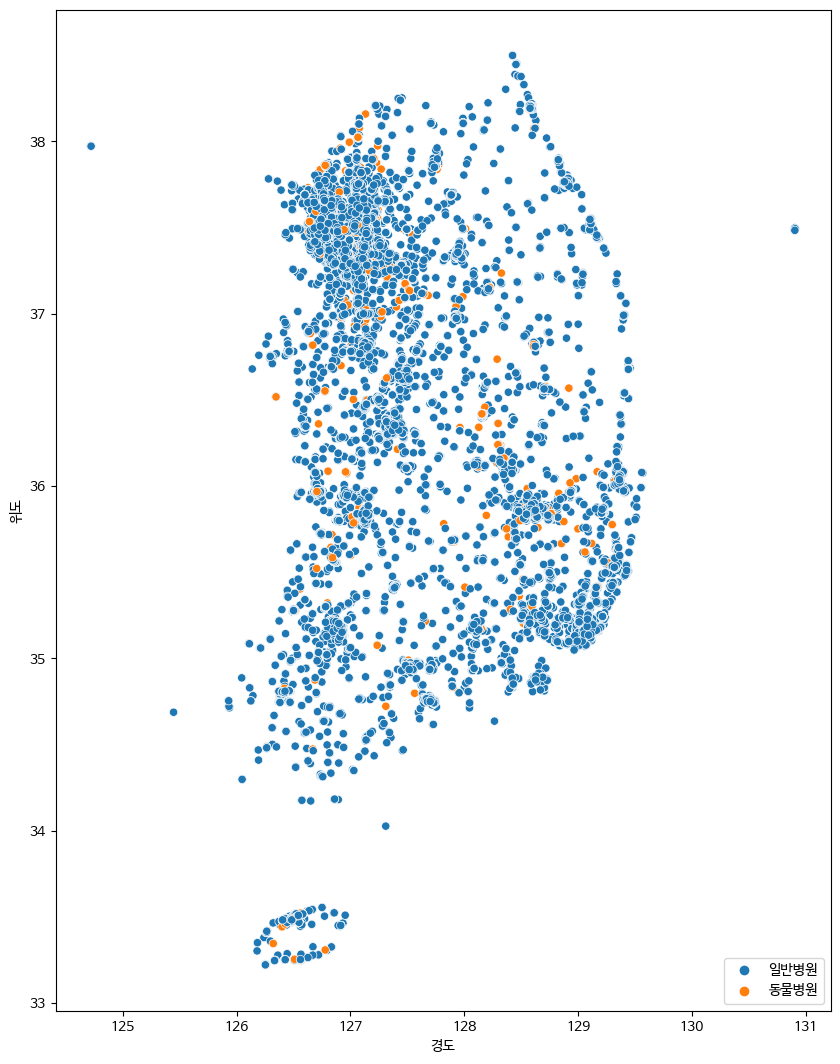

In [18]:
plt.figure(figsize=(10,13))
sns.scatterplot(data=newdf, x='경도',y='위도', hue='동물병원여부')
plt.legend(loc='lower right')

In [19]:
result2

,시도명,개수
1,경기도,992
2,서울특별시,557
3,인천광역시,193
4,경상북도,165
5,경상남도,161
6,부산광역시,153
7,충청남도,131
8,대구광역시,119
9,전라북도,111
10,강원도,85


#Q3.

<h1>📌Q3 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다.
실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.</h1>

서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요! \
피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요! \
비율이 높은 순서대로 정렬되게 구해주세요! \
수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.

소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!

In [20]:
df_seoul = df[df['시도명'] == '서울특별시']
df_seoul

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
8,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105920004010990,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,4,NaN,127.028531,37.522223
9,20755460,헬로스마일소아과,NaN,S,의료,S01,병원,S01B11,소아과,Q86201,...,1168010800100390018000001,성도빌딩,서울특별시 강남구 논현로131길 30,135010.0,6045.0,NaN,3,NaN,127.027878,37.514144
31,20872995,고운나라성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1174010800100090005004868,NaN,서울특별시 강동구 천호대로 1032,134030.0,5379.0,NaN,3,NaN,127.126507,37.537333
33,20816709,이즈타워약,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1168010100108210001000001,이즈타워,서울특별시 강남구 테헤란로 101,135080.0,6134.0,NaN,1,NaN,127.028023,37.498656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91318,16190911,동민피부과비뇨기과,NaN,S,의료,S01,병원,S01B12,비뇨기과,Q86201,...,1123010700102350001013495,미주아파트,서울특별시 동대문구 약령시로 147,130781.0,2489.0,NaN,NaN,NaN,127.045802,37.583788
91319,16108560,씨앤디자인치과기공소,NaN,S,의료,S03,유사의료업,S03B06,치과기공소,C27192,...,1154510100100600025000001,에이스하이엔드타워6차,서울특별시 금천구 벚꽃로 234,153798.0,8513.0,NaN,NaN,1901,126.886122,37.475986
91320,16131813,월계치과,NaN,S,의료,S01,병원,S01B04,치과의원,Q86202,...,1135010200109420000018688,월계역신도브래뉴,서울특별시 노원구 월계로 338,139847.0,1885.0,NaN,2,201,127.057988,37.629326
91322,16091491,설연화한복감성약방,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1126010400101740001009985,NaN,서울특별시 중랑구 공릉로 28,131848.0,2034.0,NaN,NaN,NaN,127.078082,37.613194


<Axes: >

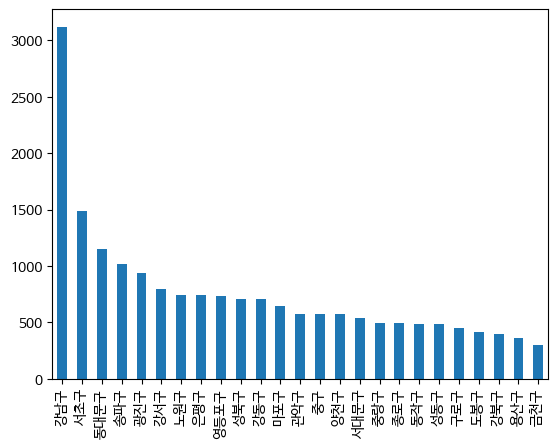

In [21]:
df_seoul['시군구명'].value_counts().plot.bar()

In [22]:
df_hsp = pd.DataFrame(df_seoul['시군구명'].value_counts())
df_hsp.columns = ['총병원수']
df_hsp

,총병원수
강남구,3120
서초구,1491
동대문구,1152
송파구,1021
광진구,935
강서구,799
노원구,741
은평구,739
영등포구,731
성북구,708


In [23]:
df_beauty = pd.DataFrame(df_seoul.query('상권업종소분류명.str.contains("피부|성형")').groupby('시군구명')['상가업소번호'].count()).reset_index()
df_beauty.columns = ['시군구명','뷰티']
df_beauty.set_index('시군구명',inplace=True)
df_beauty

,뷰티
시군구명,
강남구,603
강동구,37
강북구,12
강서구,38
관악구,17
광진구,37
구로구,17
금천구,9
노원구,26


In [24]:
cal = pd.concat([df_beauty,df_hsp],axis=1)
cal['비율'] = round(cal['뷰티']/cal['총병원수'],2)

In [25]:
cal.sort_values(by='비율',ascending=False, inplace=True)
cal[['비율']]

,비율
강남구,0.19
서초구,0.13
마포구,0.06
강서구,0.05
서대문구,0.05
중구,0.05
영등포구,0.05
양천구,0.05
송파구,0.05
강동구,0.05


#Q4.

**📌Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.**

folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
folium 문서 : https://python-visualization.github.io/folium/quickstart.html



In [26]:
import json
import folium
from folium import plugins
print(folium.__version__)

0.14.0


In [27]:
df_silver = df[df['상권업종소분류명'] == '노인/치매병원']
df_silver

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
21,21128898,다사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2632010300101360002000001,다사랑요양병원,부산광역시 북구 덕천로 339,616110.0,46610.0,NaN,1,NaN,129.040773,35.209154
62,21511155,노경회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4623035023110240001000001,NaN,전라남도 광양시 진월면 용소길 7,545851.0,57713.0,NaN,1,NaN,127.746981,34.986585
69,21406385,일산카네이션너싱홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4128510200115610001011448,해태쇼핑타운,경기도 고양시 일산동구 중산로 241,410831.0,10336.0,NaN,3,NaN,126.780122,37.693689
79,21403242,은성복지회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4615010800200220000080503,향림실버빌,전라남도 순천시 조비길 298,540950.0,57922.0,NaN,NaN,NaN,127.460606,34.991014
107,21722929,하은실버홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4725033022107880000027997,NaN,경상북도 상주시 낙동면 영남제일로 125-17,742951.0,37251.0,NaN,2,NaN,128.295524,36.365132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91184,16311246,유성재단유성요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4833010400104910005003855,외한은행,경상남도 양산시 삼일로 75,626800.0,50619.0,NaN,NaN,NaN,129.035645,35.343927
91216,16122998,실로암요양병원매점,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4514012200102240004078939,실로암사랑병원,전라북도 익산시 선화로 389,570979.0,54629.0,NaN,NaN,NaN,126.973450,35.946242
91253,16108794,한사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2917011500109670002002194,NaN,광주광역시 북구 서하로 244,500838.0,61130.0,NaN,NaN,NaN,126.907230,35.186972
91328,16198812,서울플러스,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4420025328105080000002698,배방자이1차아파트,충청남도 아산시 배방읍 호서로 460,336729.0,31495.0,NaN,2,NaN,127.083401,36.768332


In [28]:
df_silver["위도"].mean()
df_silver["경도"].mean()

map = folium.Map(location=[df_silver["위도"].mean(),df_silver["경도"].mean()], zoom_start=7)

for n in df_silver.index:
    name = df_silver.loc[n, "상호명"]
    address = df_silver.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_silver.loc[n, "위도"], df_silver.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map